## Classifier Fusion

In [14]:
import sknn.mlp

In [15]:
from init import *

In [16]:
%matplotlib inline

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
# FUS_Xt = np.hstack([CNN_Xt_pred_proba, GRB_Xt_pred_proba, SVC_Xt_pred, RFC_Xt_pred_proba, KNN_Xt_pred_proba]).astype(np.float32)
X = train_features.reshape(50000, 3*32*32)
Xt = test_features.reshape(10000, 3*32*32)
y = train_labels.flatten()
yt = test_labels.flatten()

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [73]:
CNN_Xt_pred_proba = pyload("pickles/cnn_test_predict_proba.pickle")
CNN_X_pred_proba = pyload("pickles/cnn_train_predict_proba.pickle")

GRB_Xt_pred_proba = pyload("pickles/grb_predict_proba.pickle")
GRB_X_pred_proba = pyload("pickles/grb_x_predict_proba.pickle")

SVC_Xt_pred = pyload("pickles/svc_poly_-1_predict.pickle")
SVC_X_pred = pyload("pickles/svc_poly_-1_x_predict_proba.pickle")

RFC_Xt_pred_proba = pyload("pickles/rfc_pca_200_512_predict_proba.pickle")
RFC_X_pred_proba = pyload("pickles/rfc_pca_200_512_x_predict_proba.pickle")

KNN_Xt_pred_proba = pyload("pickles/knn_pca_30_predict_proba.pickle")
KNN_X_pred_proba = pyload("pickles/knn_pca_30_x_predict_proba.pickle")

CAT_DOG_pred_proba = pyload("pickles/cat_dog_pred_proba.pickle")

CNN1_pred_proba = pyload("pickles/cnn1_test_predict_proba.pickle")
CNN2_pred_proba = pyload("pickles/cnn2_test_predict_proba.pickle")
CNN3_pred_proba = pyload("pickles/cnn3_test_predict_proba.pickle")
CNN4_pred_proba = pyload("pickles/cnn4_test_predict_proba.pickle")

CAT_Expert_pred_proba = pyload("pickles/cat_expert_pred_proba.pickle")
DOG_Expert_pred_proba = pyload("pickles/dog_expert_pred_proba.pickle")

HOG_pred_proba = np.loadtxt("pickles/Predictions_HOG.txt")

In [42]:
CNN_FUS = \
        CNN1_pred_proba.astype(np.float32)+ \
        CNN2_pred_proba.astype(np.float32)+ \
        CNN3_pred_proba.astype(np.float32)+ \
        CNN4_pred_proba.astype(np.float32)
#         + \
#         CNN_Xt_pred_proba.astype(np.float32)
CNN_FUS = CNN_FUS / 5

In [9]:
for clf in [CNN1_pred_proba, CNN2_pred_proba, CNN3_pred_proba, CNN4_pred_proba, CNN_Xt_pred_proba]:
    print(accuracy_score(yt, clf.argmax(axis=1)))

0.9333
0.9311
0.9294
0.9319
0.9319


In [53]:
print(accuracy_score(yt, CNN_FUS.argmax(axis=1)))
confusion_matrix(yt, CNN_FUS.argmax(axis=1))

0.9399


array([[954,   4,   6,   5,   0,   1,   2,   1,  19,   8],
       [  4, 967,   1,   1,   0,   0,   0,   0,   3,  24],
       [ 12,   1, 906,  13,  22,  16,  18,   9,   2,   1],
       [  6,   2,  17, 855,  16,  74,  17,   7,   2,   4],
       [  2,   0,   8,  10, 957,   4,   8,  11,   0,   0],
       [  3,   0,   9,  57,  13, 904,   4,   8,   0,   2],
       [  7,   1,   7,  10,   3,   0, 970,   1,   0,   1],
       [  2,   0,   6,   8,  15,   9,   1, 957,   1,   1],
       [ 16,   2,   5,   4,   0,   1,   1,   0, 965,   6],
       [  2,  23,   1,   1,   0,   0,   1,   1,   7, 964]])

In [7]:
FUS_X = np.hstack([CNN_X_pred_proba, GRB_X_pred_proba, SVC_X_pred, RFC_X_pred_proba, KNN_X_pred_proba]).astype(np.float32)
FUS_Xt = np.hstack([CNN_Xt_pred_proba, GRB_Xt_pred_proba, SVC_Xt_pred, RFC_Xt_pred_proba, KNN_Xt_pred_proba]).astype(np.float32)

FUS = lambda a: np.hstack(a).astype(np.float32)

In [8]:
X_pca_30 = pyload("pickles/X_pca_30.pickle")
X_pca_40 = pyload("pickles/X_pca_40.pickle")
Xt_pca_30 = pyload("pickles/Xt_pca_30.pickle")
Xt_pca_40 = pyload("pickles/Xt_pca_40.pickle")

X_pca_200 = pyload("pickles/X_pca_200.pickle")
Xt_pca_200 = pyload("pickles/Xt_pca_200.pickle")

In [51]:
clf = GaussianNB()
clf.fit(FUS_X, y)

GaussianNB()

In [52]:
accuracy_score(yt, clf.predict(FUS_Xt))

0.49880000000000002

In [26]:
FUS_X_CNN_KNN = FUS([CNN_X_pred_proba, KNN_X_pred_proba, GRB_X_pred_proba])
FUS_Xt_CNN_KNN = FUS([CNN_Xt_pred_proba, KNN_Xt_pred_proba, GRB_Xt_pred_proba])

rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(FUS_X_CNN_KNN, y)
Pred = rfc.predict(FUS_Xt_CNN_KNN)
print(accuracy_score(yt, Pred))
print(confusion_matrix(yt, Pred))

log = LogisticRegression()
log.fit(FUS_X_CNN_KNN, y)
Pred = log.predict(FUS_Xt_CNN_KNN)
print(accuracy_score(yt, Pred))
print(confusion_matrix(yt, Pred))

0.9272
[[938   4  12   4   1   0   1   1  23  16]
 [  6 951   3   0   1   1   0   0   4  34]
 [ 16   1 896  15  25  19  13   6   3   6]
 [ 10   3  29 789  28  99  13   9   4  16]
 [  5   0  11  12 943   8   6  14   0   1]
 [  2   1  19  38  15 909   2   9   0   5]
 [  7   0  13  10   8   1 958   1   0   2]
 [  4   0   5   3  17   9   1 959   0   2]
 [ 15   4   5   2   1   1   1   0 961  10]
 [  4  16   1   1   0   0   1   1   8 968]]
0.9316
[[936   4  14   7   0   0   4   1  24  10]
 [  5 965   2   0   0   2   0   0   3  23]
 [ 13   1 902  15  22  18  18   7   3   1]
 [  6   1  17 844  15  87  15   8   3   4]
 [  4   1  12  10 943  11   8  11   0   0]
 [  2   1  14  65  13 890   4   8   0   3]
 [  7   1   7  12   4   4 962   2   0   1]
 [  4   0   5   9  17   9   1 954   0   1]
 [ 15   6   4   3   0   1   1   0 963   7]
 [  6  22   1   2   0   0   1   1  10 957]]


In [12]:
confusion_matrix(yt, KNN_Xt_pred_proba.argmax(axis=1))

array([[592,  27,  84,  16,  49,  10,  37,  11, 154,  20],
       [ 90, 418,  54,  32,  70,  18,  99,  20, 133,  66],
       [126,  12, 422,  53, 165,  32, 125,  27,  29,   9],
       [ 57,  25, 162, 216, 129, 121, 187,  50,  31,  22],
       [ 69,   8, 239,  32, 435,  16, 129,  39,  27,   6],
       [ 52,  20, 161, 132, 129, 283, 133,  49,  34,   7],
       [ 25,   5, 178,  43, 177,  22, 515,  11,  16,   8],
       [ 84,  22, 126,  44, 171,  52,  92, 343,  36,  30],
       [161,  40,  32,  37,  42,  13,  20,  13, 620,  22],
       [125, 126,  47,  30,  52,  20,  75,  38, 153, 334]])

In [19]:
print(accuracy_score(yt, ((5*CNN_Xt_pred_proba.astype(np.float32)+KNN_Xt_pred_proba.astype(np.float32))/2).argmax(axis=1)))
confusion_matrix(yt, ((5*CNN_Xt_pred_proba.astype(np.float32)+KNN_Xt_pred_proba.astype(np.float32))/2).argmax(axis=1))

0.9323


array([[938,   4,  13,   7,   0,   0,   4,   1,  24,   9],
       [  4, 966,   2,   0,   0,   2,   0,   0,   3,  23],
       [ 12,   1, 902,  15,  22,  18,  19,   7,   3,   1],
       [  6,   1,  18, 843,  15,  87,  16,   8,   3,   3],
       [  5,   1,  12,  10, 942,  11,   8,  11,   0,   0],
       [  2,   1,  13,  64,  13, 891,   4,   9,   0,   3],
       [  7,   1,   8,  13,   4,   2, 963,   1,   0,   1],
       [  3,   0,   5,   9,  16,   8,   1, 956,   1,   1],
       [ 14,   5,   4,   3,   0,   1,   1,   0, 966,   6],
       [  6,  22,   1,   2,   0,   0,   1,   1,  11, 956]])

In [55]:
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(FUS_X, y)
accuracy_score(yt, rfc.predict(FUS_Xt))

0.88929999999999998

In [57]:
rfc = RandomForestClassifier(n_estimators=512)
rfc.fit(FUS_X, y)
accuracy_score(yt, rfc.predict(FUS_Xt))

0.90059999999999996

In [7]:
rfc = RandomForestClassifier(n_estimators=1024)
rfc.fit(FUS_X, y)
accuracy_score(yt, rfc.predict(FUS_Xt))

0.90839999999999999

In [8]:
rfc = RandomForestClassifier(n_estimators=2048)
rfc.fit(FUS_X, y)
accuracy_score(yt, rfc.predict(FUS_Xt))

0.90529999999999999

In [ ]:
grb = GradientBoostingClassifier()
grb.fit(X, y)
accuracy_score(yt, grb.predict(FUS_Xt))

In [31]:
FUS_X_CNN_KNN = FUS([CNN_X_pred_proba]) # , KNN_X_pred_proba
FUS_Xt_CNN_KNN = FUS([CNN_Xt_pred_proba]) #, KNN_Xt_pred_proba

In [12]:
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(FUS_X_CNN_KNN, y)
accuracy_score(yt, rfc.predict(FUS_Xt_CNN_KNN))

0.92710000000000004

In [32]:
rfc = RandomForestClassifier(n_estimators=256)
rfc.fit(FUS_X_CNN_KNN, y)
accuracy_score(yt, rfc.predict(FUS_Xt_CNN_KNN))

0.92120000000000002

In [14]:
rfc = RandomForestClassifier(n_estimators=512)
rfc.fit(FUS_X_CNN_KNN, y)
accuracy_score(yt, rfc.predict(FUS_Xt_CNN_KNN))

0.92669999999999997

In [15]:
rfc = RandomForestClassifier(n_estimators=1024)
rfc.fit(FUS_X_CNN_KNN, y)
accuracy_score(yt, rfc.predict(FUS_Xt_CNN_KNN))

0.92759999999999998

In [27]:
rfc = RandomForestClassifier(n_estimators=2048)
rfc.fit(FUS_X_CNN_KNN, y)
accuracy_score(yt, rfc.predict(FUS_Xt_CNN_KNN))

0.9274

In [28]:
grb = GradientBoostingClassifier()
grb.fit(FUS_X_CNN_KNN, y)
accuracy_score(yt, grb.predict(FUS_Xt_CNN_KNN))

0.90759999999999996

In [9]:
X_CNN_PCA200 = FUS([CNN_X_pred_proba, X_pca_200])
Xt_CNN_PCA200 = FUS([CNN_Xt_pred_proba, Xt_pca_200])

In [10]:
rfc = RandomForestClassifier(n_estimators=1024)
rfc.fit(X_CNN_PCA200, y)
accuracy_score(yt, rfc.predict(Xt_CNN_PCA200))

0.9304

In [28]:
confusion_matrix(yt, CNN_Xt_pred_proba.argmax(axis=1))

array([[936,   4,  14,   7,   1,   0,   3,   1,  24,  10],
       [  4, 966,   2,   0,   0,   2,   0,   0,   3,  23],
       [ 12,   1, 900,  14,  22,  19,  21,   7,   3,   1],
       [  7,   1,  17, 840,  16,  88,  17,   8,   3,   3],
       [  5,   1,  10,  12, 941,  12,   8,  11,   0,   0],
       [  2,   1,  11,  66,  13, 891,   4,  10,   0,   2],
       [  7,   1,   8,  12,   4,   3, 963,   1,   0,   1],
       [  4,   0,   5,   9,  16,   7,   1, 957,   0,   1],
       [ 13,   4,   5,   3,   0,   1,   1,   0, 967,   6],
       [  4,  23,   1,   2,   0,   0,   1,   1,  10, 958]])

In [30]:
confusion_matrix(yt, KNN_Xt_pred_proba.argmax(axis=1))

array([[592,  27,  84,  16,  49,  10,  37,  11, 154,  20],
       [ 90, 418,  54,  32,  70,  18,  99,  20, 133,  66],
       [126,  12, 422,  53, 165,  32, 125,  27,  29,   9],
       [ 57,  25, 162, 216, 129, 121, 187,  50,  31,  22],
       [ 69,   8, 239,  32, 435,  16, 129,  39,  27,   6],
       [ 52,  20, 161, 132, 129, 283, 133,  49,  34,   7],
       [ 25,   5, 178,  43, 177,  22, 515,  11,  16,   8],
       [ 84,  22, 126,  44, 171,  52,  92, 343,  36,  30],
       [161,  40,  32,  37,  42,  13,  20,  13, 620,  22],
       [125, 126,  47,  30,  52,  20,  75,  38, 153, 334]])

In [31]:
confusion_matrix(yt, GRB_Xt_pred_proba.argmax(axis=1))

array([[544,  31,  68,  17,  37,  18,  25,  40, 174,  46],
       [ 44, 554,  23,  36,  23,  35,  32,  34,  46, 173],
       [ 80,  28, 345,  71, 154,  65, 125,  76,  39,  17],
       [ 49,  30,  97, 293,  68, 183, 155,  49,  29,  47],
       [ 50,  11, 148,  38, 406,  49, 167,  92,  26,  13],
       [ 31,  20, 101, 165,  69, 406,  84,  69,  31,  24],
       [  8,  32,  86,  61, 117,  37, 593,  26,  10,  30],
       [ 51,  16,  46,  70, 108,  96,  50, 473,  19,  71],
       [114,  69,  14,  28,  20,  28,  20,  23, 614,  70],
       [ 55, 153,  15,  38,  14,  29,  27,  47,  72, 550]])

In [25]:
svc = svm.SVC(kernel='poly')
svc.fit(X_CNN_PCA200, y)
accuracy_score(yt, svc.predict(Xt_CNN_PCA200))

0.44869999999999999

In [44]:
accuracy_score(yt, CNN_Xt_pred_proba.argmax(axis=1).flatten())

0.93189999999999995

### Optimization Problem

In [38]:
def acc(W, C, y=None):
    if y is None:
        y = yt
    global m
    global n
    _ = accuracy_score(y, np.array([w*c.astype(np.float32) for w,c in zip(W,C)]).sum(axis=0).argmax(axis=1))
    if _ > m:
        n = W
        m = _
    print("\r({Wt}). Accuracy: {0:.4f}. Highest Accuracy: {1:.4f}. Highest Weights: {Wh}".format(_, m, Wt=W, Wh=n), end="")
    return _

In [77]:
print(accuracy_score(yt, CNN1_pred_proba.argmax(axis=1)))

0.9333


In [79]:
n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN1_pred_proba, HOG_pred_proba]) for x in itr] for y in itr])

([9.5, 9.5]). Accuracy: 0.5775. Highest Accuracy: 0.9333. Highest Weights: [0.5, 0.0]

In [57]:
m = 0; 
itr = np.arange(0, 10, 0.1); 
n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN_FUS, KNN_Xt_pred_proba]) for x in itr] for y in itr])

([9.9000000000000004, 9.9000000000000004]). Accuracy: 0.9271. Highest Accuracy: 0.9403. Highest Weights: [1.5, 0.10000000000000001]

In [59]:
n

[1.5, 0.10000000000000001]

In [57]:
Pred_9399 = 1.5 * CNN_FUS.astype(np.float32) + 0.1 * KNN_Xt_pred_proba.astype(np.float32)

In [58]:
accuracy_score(yt, Pred_9399.argmax(axis=1))

0.94030000000000002

In [113]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

AttributeError: Unknown property format

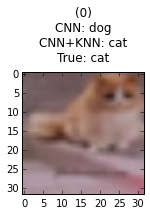

In [126]:
idx = CNN_FUS.argmax(axis=1)!=Pred_9399.argmax(axis=1)
vis = Xt[idx]
knn_vote = Pred_9399[idx].argmax(axis=1)
cnn_vote = CNN_FUS[idx].argmax(axis=1)
true_vote = yt[idx]

fig = plt.figure(0)
fig.set_size_inches(10, 10)
for i in range(13):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(vis[i].reshape(3,32,32).transpose(1,2,0))
    plt.title("({})\nCNN: {}\nCNN+KNN: {}\nTrue: {}".format(i, labels[cnn_vote[i]], labels[knn_vote[i]], labels[true_vote[i]]), y=1.05, )
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.)
    plt.axis('off')

In [204]:
x,y = (2.,.5); Pred_9346 = x*CNN1_pred_proba.astype(np.float32)+y*KNN_Xt_pred_proba.astype(np.float32)

In [208]:
n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [Pred_9346, KNN_Xt_pred_proba]) for x in itr] for y in itr])

array([[951,   3,   9,   5,   1,   2,   3,   1,  15,  10],
       [  5, 964,   2,   1,   0,   1,   0,   0,   3,  24],
       [ 11,   0, 906,  17,  22,  15,  18,   7,   3,   1],
       [  8,   3,  19, 839,  21,  78,  15,   8,   3,   6],
       [  1,   0,  12,  12, 950,   9,   7,   8,   0,   1],
       [  3,   0,   8,  66,  13, 899,   4,   6,   0,   1],
       [  6,   0,  12,  11,   5,   1, 962,   1,   1,   1],
       [  2,   0,   8,  16,  14,  13,   1, 944,   1,   1],
       [ 17,   3,   4,   4,   0,   0,   0,   0, 966,   6],
       [  3,  20,   3,   2,   0,   0,   1,   0,   6, 965]])

In [62]:
cat_index = Pred_9399.argmax(axis=1) == 3
dog_index = Pred_9399.argmax(axis=1) == 5

CAT_Expert_pred_proba_mc = np.hstack((np.zeros((10000,3)), CAT_Expert_pred_proba[:,0].reshape(-1,1), np.zeros((10000, 1)), CAT_Expert_pred_proba[:,1].reshape(-1,1), np.zeros((10000, 4)))) 
DOG_Expert_pred_proba_mc = np.hstack((np.zeros((10000,3)), DOG_Expert_pred_proba[:,0].reshape(-1,1), np.zeros((10000, 1)), DOG_Expert_pred_proba[:,1].reshape(-1,1), np.zeros((10000, 4)))) 

In [63]:
n,m = [0,0],0; exp_cat = np.array([[acc([x,y], [Pred_9399[cat_index], CAT_DOG_pred_proba_mc[cat_index]], yt[cat_index]) for x in itr] for y in itr]); n_cat = n

([9.9000000000000004, 9.9000000000000004]). Accuracy: 0.8839. Highest Accuracy: 0.8902. Highest Weights: [0.5, 0.10000000000000001]

In [64]:
n,m = [0,0],0; exp_dog = np.array([[acc([x,y], [Pred_9399[dog_index], CAT_DOG_pred_proba_mc[dog_index]], yt[dog_index]) for x in itr] for y in itr]); n_dog = n

([9.9000000000000004, 9.9000000000000004]). Accuracy: 0.8940. Highest Accuracy: 0.8999. Highest Weights: [0.40000000000000002, 0.30000000000000004]

In [65]:
Pred_9399_CAT_DOG = Pred_9399.copy()
Pred_9399_CAT_DOG[cat_index] = n_cat[0] * Pred_9399[cat_index].astype(np.float32) + n_cat[1] * CAT_DOG_pred_proba_mc[cat_index].astype(np.float32)
Pred_9399_CAT_DOG[dog_index] = n_dog[0] * Pred_9399[dog_index].astype(np.float32) + n_dog[1] * CAT_DOG_pred_proba_mc[dog_index].astype(np.float32)

In [66]:
print(accuracy_score(yt, Pred_9399_CAT_DOG.argmax(axis=1)))

0.9408


In [71]:
m =0; exp_grb = np.array([[acc([x,y], [CNN_Xt_pred_proba, GRB_Xt_pred_proba]) for x in itr] for y in itr])

([9.5, 9.5]). Accuracy: 0.9266. Highest Accuracy: 0.9319.

In [72]:
m =0; exp_rfc = np.array([[acc([x,y], [CNN_Xt_pred_proba, RFC_Xt_pred_proba]) for x in itr] for y in itr])

([9.5, 9.5]). Accuracy: 0.9313. Highest Accuracy: 0.9320.

In [21]:
(int(exp.argmax()/exp.shape[0]), int(exp.argmax()%exp.shape[0]))

(2, 9)

In [10]:
x,y = (9,2); Pred_9325 = ((x*CNN1_pred_proba.astype(np.float32)+y*KNN_Xt_pred_proba.astype(np.float32)))
print(accuracy_score(yt, Pred_9325.argmax(axis=1)))
print(confusion_matrix(yt, Pred_9325.argmax(axis=1)))

0.9325
[[939   4  13   7   0   0   4   1  24   8]
 [  4 966   2   0   0   2   0   0   3  23]
 [ 12   1 902  15  22  18  19   7   3   1]
 [  6   1  18 844  15  87  16   7   3   3]
 [  5   1  12  10 942  11   8  11   0   0]
 [  2   1  13  64  13 891   4   9   0   3]
 [  7   1   8  13   4   2 963   1   0   1]
 [  3   0   5   9  16   8   1 956   1   1]
 [ 14   5   4   3   0   1   1   0 966   6]
 [  6  22   1   2   0   0   1   1  11 956]]


In [27]:
np.zeros((10000,1))

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

(10000,)

In [37]:
CAT_DOG_pred_proba_mc = np.hstack((np.zeros((10000,3)), CAT_DOG_pred_proba[:,0].reshape(-1,1), np.zeros((10000, 1)), CAT_DOG_pred_proba[:,1].reshape(-1,1), np.zeros((10000, 4)))) 

In [41]:
cat_index = Pred_9399.argmax(axis=1) == 3
dog_index = Pred_9399.argmax(axis=1) == 5
CAT_DOG_pred_proba_mc = np.hstack((np.zeros((10000,3)), CAT_DOG_pred_proba[:,0].reshape(-1,1), np.zeros((10000, 1)), CAT_DOG_pred_proba[:,1].reshape(-1,1), np.zeros((10000, 4)))) 

print(accuracy_score(yt[cat_index], Pred_9399[cat_index].argmax(axis=1)))
print(accuracy_score(yt[cat_index], CAT_DOG_pred_proba_mc[cat_index].argmax(axis=1)))

print(accuracy_score(yt[dog_index], Pred_9399[dog_index].argmax(axis=1)))
print(accuracy_score(yt[dog_index], CAT_DOG_pred_proba_mc[dog_index].argmax(axis=1)))

0.889352818372
0.649269311065
0.894788593904
0.627335299902


In [60]:
itr = np.arange(0, 10, 0.5)
n,m = [0,0],0; exp_cat = np.array([[acc([x,y], [Pred_9325[cat_index], CAT_DOG_pred_proba_mc[cat_index]], yt[cat_index]) for x in itr] for y in itr])

([9.5, 9.5]). Accuracy: 0.8759. Highest Accuracy: 0.8780.

In [63]:
n_cat = n

In [64]:
n,m = [0,0],0; exp_dog = np.array([[acc([x,y], [Pred_9325[dog_index], CAT_DOG_pred_proba_mc[dog_index]], yt[dog_index]) for x in itr] for y in itr])

([9.5, 9.5]). Accuracy: 0.8755. Highest Accuracy: 0.8853.

In [65]:
n_dog = n

In [66]:
n_dog

[0.5, 3.5]

In [69]:
Pred_9325_CAT_DOG = Pred_9325.copy()
Pred_9325_CAT_DOG[cat_index] = n_cat[0] * Pred_9325[cat_index].astype(np.float32) + n_cat[1] * CAT_DOG_pred_proba_mc[cat_index].astype(np.float32)
Pred_9325_CAT_DOG[dog_index] = n_dog[0] * Pred_9325[dog_index].astype(np.float32) + n_dog[1] * CAT_DOG_pred_proba_mc[dog_index].astype(np.float32)

In [71]:
print(accuracy_score(yt, Pred_9325_CAT_DOG.argmax(axis=1)))
print(confusion_matrix(yt, Pred_9325_CAT_DOG.argmax(axis=1)))

0.9342
[[939   4  13   7   0   0   4   1  24   8]
 [  4 966   2   1   0   1   0   0   3  23]
 [ 12   1 902  16  22  17  19   7   3   1]
 [  6   1  18 868  15  63  16   7   3   3]
 [  5   1  12  12 942   9   8  11   0   0]
 [  2   1  13  71  13 884   4   9   0   3]
 [  7   1   8  13   4   2 963   1   0   1]
 [  3   0   5  10  16   7   1 956   1   1]
 [ 14   5   4   3   0   1   1   0 966   6]
 [  6  22   1   2   0   0   1   1  11 956]]


In [85]:
itr = np.arange(0, 10, 0.5); n,m = [0,0,0],0; exp_dog = np.array([acc([x,y,z], [CNN_Xt_pred_proba, CAT_DOG_pred_proba_mc, KNN_Xt_pred_proba], yt) for x in itr for y in itr for z in itr])

([7.5, 0.5, 8.0]). Accuracy: 0.9200. Highest Accuracy: 0.9336.

KeyboardInterrupt: 

In [98]:
itr = np.arange(0, 10, 0.5); n,m = [0,0],0; exp_dog = np.array([acc([x,y], [CNN_Xt_pred_proba, CAT_DOG_pred_proba_mc], yt) for x in itr for y in itr])

([9.5, 9.5]). Accuracy: 0.8744. Highest Accuracy: 0.9336. Highest Weights: [3.0, 0.5]

In [105]:
Pred_CNN_KNN = 3.0*CNN_Xt_pred_proba.astype(np.float32)+0.5*CAT_DOG_pred_proba_mc.astype(np.float32)
print(accuracy_score(yt, Pred_CNN_KNN.argmax(axis=1)))
itr = np.arange(0, 10, 0.5); n,m = [0,0],0; exp_dog = np.array([acc([x,y], [Pred_CNN_KNN, KNN_Xt_pred_proba], yt) for x in itr for y in itr])

0.9336
([9.5, 9.5]). Accuracy: 0.9320. Highest Accuracy: 0.9336. Highest Weights: [0.5, 0.0]

### Multi-Layer Perceptron

In [37]:
from sknn.mlp import Classifier, Layer

nn = Classifier(
    layers=[
        Layer("Rectifier", units=400),
        Layer("Softmax")],
    learning_rate=0.001,
    n_iter=25)
nn.fit(X_pca_200, y)

Pred = nn.predict(Xt_pca_200)

print(accuracy_score(yt, Pred))
print(confusion_matrix(yt, Pred))

RuntimeError: Training diverged and returned NaN.

In [106]:
cm = confusion_matrix(yt, CNN_Xt_pred_proba.argmax(axis=1))

/Users/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


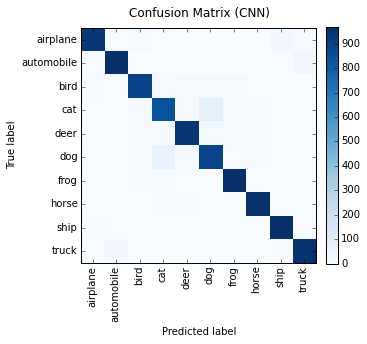

In [193]:
fig = plt.figure(figsize = (5,5)) # create a 5 x 5 figure 
im = plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar(im, fraction=0.046, pad=0.04)
targets = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
tick_marks = range(0,10)
plt.xticks(tick_marks, targets, rotation=90)
plt.yticks(tick_marks, targets)
plt.tight_layout()
plt.title("Confusion Matrix (CNN)", y=1.025)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [127]:
cm

array([[936,   4,  14,   7,   1,   0,   3,   1,  24,  10],
       [  4, 966,   2,   0,   0,   2,   0,   0,   3,  23],
       [ 12,   1, 900,  14,  22,  19,  21,   7,   3,   1],
       [  7,   1,  17, 840,  16,  88,  17,   8,   3,   3],
       [  5,   1,  10,  12, 941,  12,   8,  11,   0,   0],
       [  2,   1,  11,  66,  13, 891,   4,  10,   0,   2],
       [  7,   1,   8,  12,   4,   3, 963,   1,   0,   1],
       [  4,   0,   5,   9,  16,   7,   1, 957,   0,   1],
       [ 13,   4,   5,   3,   0,   1,   1,   0, 967,   6],
       [  4,  23,   1,   2,   0,   0,   1,   1,  10, 958]])

### Difference Between CNN & CNN+KNN

In [33]:
accuracy_score(yt, CNN1_pred_proba.argmax(axis=1))

0.93330000000000002

In [35]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN2_pred_proba, KNN_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9200. Highest Accuracy: 0.9315. Highest Weights: [2.25, 0.5]

In [24]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN1_pred_proba, KNN_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9233. Highest Accuracy: 0.9346. Highest Weights: [1.0, 0.25]

In [25]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN3_pred_proba, KNN_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9209. Highest Accuracy: 0.9297. Highest Weights: [2.0, 0.25]

In [26]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN4_pred_proba, KNN_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9215. Highest Accuracy: 0.9325. Highest Weights: [2.25, 0.5]

In [27]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [GRB_Xt_pred_proba, KNN_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.4822. Highest Accuracy: 0.4958. Highest Weights: [0.75, 0.25]

In [29]:
print(accuracy_score(yt, GRB_Xt_pred_proba.argmax(axis=1)))

0.478


In [30]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [RFC_Xt_pred_proba, KNN_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.4537. Highest Accuracy: 0.5080. Highest Weights: [8.25, 1.0]

In [31]:
print(accuracy_score(yt, RFC_Xt_pred_proba.argmax(axis=1)))

0.4914


In [32]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN1_pred_proba, GRB_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9291. Highest Accuracy: 0.9338. Highest Weights: [3.75, 0.5]

In [34]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN2_pred_proba, GRB_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9265. Highest Accuracy: 0.9315. Highest Weights: [4.0, 1.25]

In [36]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN3_pred_proba, GRB_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9273. Highest Accuracy: 0.9298. Highest Weights: [0.5, 0.25]

In [37]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN4_pred_proba, GRB_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9266. Highest Accuracy: 0.9319. Highest Weights: [0.25, 0.0]

In [ ]:
print(accuracy_score(yt, Pred.argmax(axis=1)))

In [46]:
itr = np.arange(0, 10, 0.5); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN1_pred_proba, CNN2_pred_proba], yt) for x in itr] for y in itr])

([9.5, 9.5]). Accuracy: 0.9377. Highest Accuracy: 0.9391. Highest Weights: [5.5, 3.5]

In [47]:
CNN12 = n[0] * CNN1_pred_proba.astype(np.float32) + n[1] * CNN2_pred_proba.astype(np.float32)

In [48]:
print(accuracy_score(yt, CNN12.argmax(axis=1)))

0.9391


In [49]:
itr = np.arange(0, 10, 0.5); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN12, CNN3_pred_proba], yt) for x in itr] for y in itr])

([9.5, 9.5]). Accuracy: 0.9391. Highest Accuracy: 0.9394. Highest Weights: [2.5, 9.5]

In [ ]:
itr = np.arange(0, 10, 0.5); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN12, CNN3_pred_proba], yt) for x in itr] for y in itr])

In [50]:
CNN123 = n[0] * CNN12 + n[1] * CNN3_pred_proba.astype(np.float32)

In [51]:
itr = np.arange(0, 10, 0.5); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN123, CNN4_pred_proba], yt) for x in itr] for y in itr])

([9.5, 9.5]). Accuracy: 0.9395. Highest Accuracy: 0.9399. Highest Weights: [0.5, 5.5]

In [52]:
CNN_

[0.5, 5.5]

In [54]:
CNN_FUS.argmax(axis=1)
CNN_

array([3, 8, 8, ..., 5, 1, 7])

In [117]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN1_pred_proba, RFC_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9330. Highest Accuracy: 0.9340. Highest Weights: [1.25, 0.75]

In [118]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN2_pred_proba, RFC_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9307. Highest Accuracy: 0.9316. Highest Weights: [0.75, 0.25]

In [119]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN3_pred_proba, RFC_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9282. Highest Accuracy: 0.9298. Highest Weights: [3.25, 0.5]

In [120]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN4_pred_proba, RFC_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9313. Highest Accuracy: 0.9321. Highest Weights: [7.25, 3.75]

In [121]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN_FUS, RFC_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9368. Highest Accuracy: 0.9399. Highest Weights: [0.25, 0.0]

In [125]:
itr = np.arange(0, 10, 0.25); n,m = [0,0],0; exp_knn = np.array([[acc([x,y], [CNN_FUS, KNN_Xt_pred_proba], yt) for x in itr] for y in itr])

([9.75, 9.75]). Accuracy: 0.9271. Highest Accuracy: 0.9403. Highest Weights: [3.75, 0.25]